### Import Libraries

In [1]:
# Pre Processing 
import pandas as pd
import datetime as dt
import numpy as np

# Exploratory Data
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import squarify 
%matplotlib inline

# Pycaret Environment
from pycaret.regression import setup
from pycaret.regression import compare_models
from pycaret.regression import *

### Load Ames Housing Dataset

In [2]:
Ames = pd.read_csv('Ames_train.csv')
pd.set_option('display.max_columns', None)
Ames

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

### Dataset Profiling 

In [3]:
def dataset_profile(csv):
    print("Dataset dimension :", csv.ndim)
    print("Dataset shape :", csv.shape)
    print("Dataset size :", csv.size)

dataset_profile(Ames)

Dataset dimension : 2
Dataset shape : (1460, 81)
Dataset size : 118260


In [4]:
def features_types(csv):
    types = csv.dtypes.reset_index()
    types.columns = ['Features','Data Type']
    return types

features_types(Ames)

,Features,Data Type
0,Id,int64
1,MSSubClass,int64
2,MSZoning,object
3,LotFrontage,float64
4,LotArea,int64
5,Street,object
6,Alley,object
7,LotShape,object
8,LandContour,object
9,Utilities,object


### Dataset Inspections

### Missing and Blank Values Checking

In [5]:
missing_data = Ames.isnull().sum().reset_index()
missing_data.columns = ['Features','Missing Values']
blank_data = Ames.apply(lambda x : x == ' ').sum().reset_index()
blank_data.columns = ['Features','Blank Values']
merged_data = pd.merge(missing_data, blank_data, on=['Features'])
merged_data['Filling Factor'] = (Ames.shape[0]-missing_data['Missing Values'] + Ames.shape[0]-blank_data['Blank Values'])/Ames.shape[0]*50
merged_data.sort_values(by='Filling Factor',ascending=True)

,Features,Missing Values,Blank Values,Filling Factor
72,PoolQC,1453,0,50.239726
74,MiscFeature,1406,0,51.849315
6,Alley,1369,0,53.116438
73,Fence,1179,0,59.623288
57,FireplaceQu,690,0,76.369863
3,LotFrontage,259,0,91.130137
59,GarageYrBlt,81,0,97.226027
58,GarageType,81,0,97.226027
60,GarageFinish,81,0,97.226027
63,GarageQual,81,0,97.226027


### Cross Checking Missing Values with ASSERT Statement

In [6]:
# Assert that there are no missing values in the dataframe

assert pd.notnull(Ames).all().all()

AssertionError: 

Interpretation
 - The above command does indeed throw an error. Hence, it is confirmed that there are missing or negative values in the dataset
 - Some of the values within dataset either missing or negative.
 - Proceed to data cleaning

### Dataset Overview

In [7]:
def initial_eda(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (df.shape[0], df.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Expect a DataFrame but got a %15s" % (type(df)))
        
initial_eda(Ames)

Dimensions : 1460 rows, 81 columns
Total NA Values : 6965 
                           Column Name  Data Type      #Distinct  NA Values
                                    Id      int64         1460          0
                            MSSubClass      int64           15          0
                              MSZoning     object            5          0
                           LotFrontage    float64          110        259
                               LotArea      int64         1073          0
                                Street     object            2          0
                                 Alley     object            2       1369
                              LotShape     object            4          0
                           LandContour     object            4          0
                             Utilities     object            2          0
                             LotConfig     object            5          0
                             LandSlope     object  

### Categorical Features

In [8]:
categorical = [var for var in Ames.columns if Ames[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 43 categorical variables

The categorical variables are :

 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


### Numerical Features

In [9]:
numerical = [var for var in Ames.columns if Ames[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 38 numerical variables

The numerical variables are :

 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


### Categorical Features Distinc Value Distribution

In [10]:
for var in categorical: 
    
    print(Ames[var].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype:

### Data Cleaning

### Determining The Most Occuring Values foe Each Categorical Features Available

In [ ]:
Ames_Cate = Ames[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
                 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
                 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
                 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
                 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']]

def most_frequent(df):
    dfs = []

    for col in df.columns:
        top_values = []
        top_values = df[col].mode()
        dfs.append(pd.DataFrame({col: top_values}).reset_index(drop=True))
    return pd.concat(dfs, axis=1)
    
most_frequent(Ames_Cate)

### Dataset Missing Values Features Handling

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = SimpleImputer(strategy='most_frequent')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical),
        ('cat', categorical_transformer, categorical)
    ])
# Fit to Dataframe
array_prepared = preprocessor.fit_transform(Ames)

# Converts the array to Dataframe
my_cols = numerical + categorical
Ames_prepared = pd.DataFrame(array_prepared, 
             columns=(list(my_cols)))

# Replace Features type to Their Correct Ones
Ames_prepared[numerical] = Ames_prepared[numerical].astype('float64')
Ames_prepared

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Abnorml
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,0.0,953.0,953.0,953.0,694.0,0.0,1647.0,0.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,1999.0,2.0,460.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,175000.0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1456,1457.0,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,163.0,589.0,1542.0,2073.0,0.0,0.0,2073.0,1.0,0.0,2.0,0.0,3.0,1.0,7.0,2.0,1978.0,2.0,500.0,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,210000.0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1457,1458.0,70.0

### Cross Checking For Missing Values in Dataset

In [12]:
# Assert that there are no missing values in the dataframe

assert pd.notnull(Ames_prepared).all().all()

In [13]:
initial_eda(Ames_prepared)

Dimensions : 1460 rows, 81 columns
Total NA Values : 0 
                           Column Name  Data Type      #Distinct  NA Values
                                    Id    float64         1460          0
                            MSSubClass    float64           15          0
                           LotFrontage    float64          110          0
                               LotArea    float64         1073          0
                           OverallQual    float64           10          0
                           OverallCond    float64            9          0
                             YearBuilt    float64          112          0
                          YearRemodAdd    float64           61          0
                            MasVnrArea    float64          327          0
                            BsmtFinSF1    float64          637          0
                            BsmtFinSF2    float64          144          0
                             BsmtUnfSF    float64     

### Exploratory Data 

In [14]:
Ames_prepared.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Numerical Feature Plot

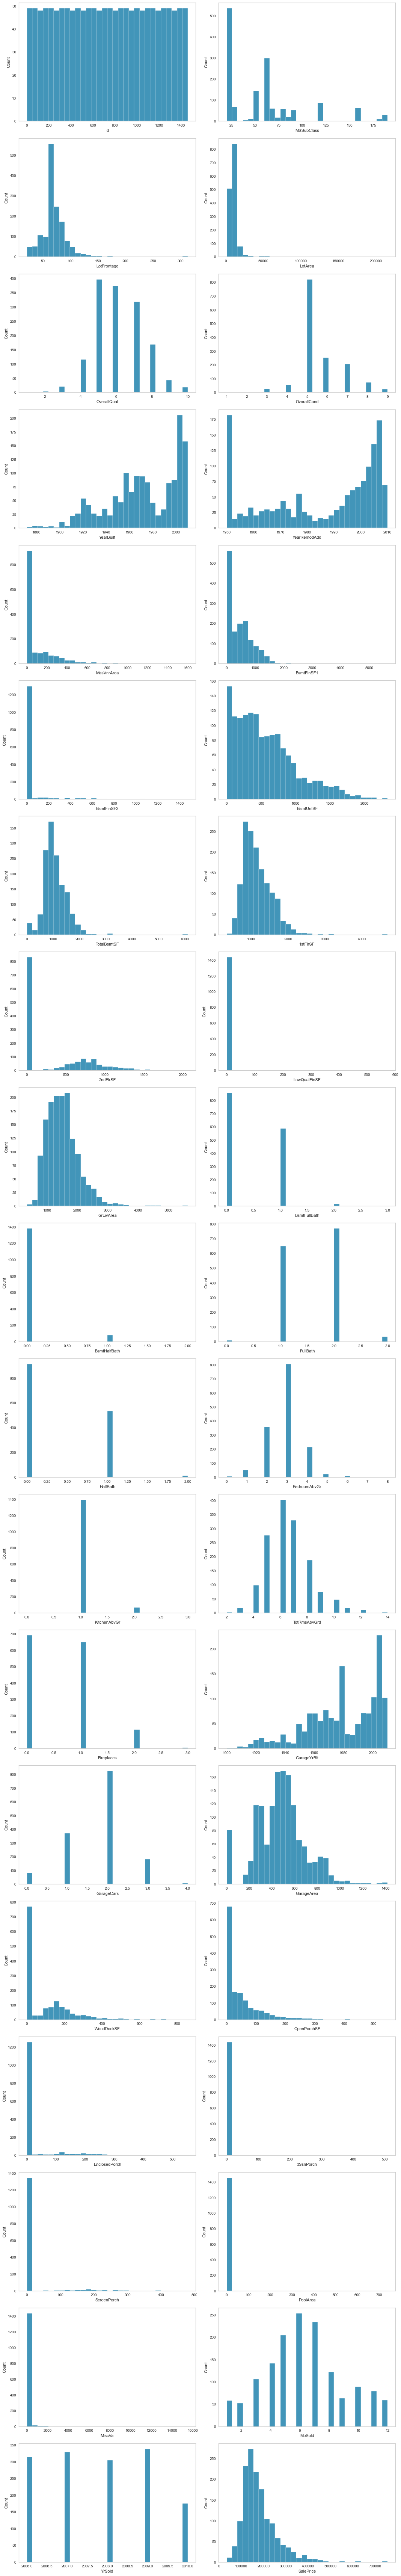

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

plt.figure(figsize=(15, 100))
for i in range(0, len(list(Ames_prepared[numerical]))):
    plt.subplot(20, 2, i+1)
    sns.histplot(x=Ames_prepared[list(Ames_prepared[numerical])[i]],bins = 30)
    plt.tight_layout()

### Outliers

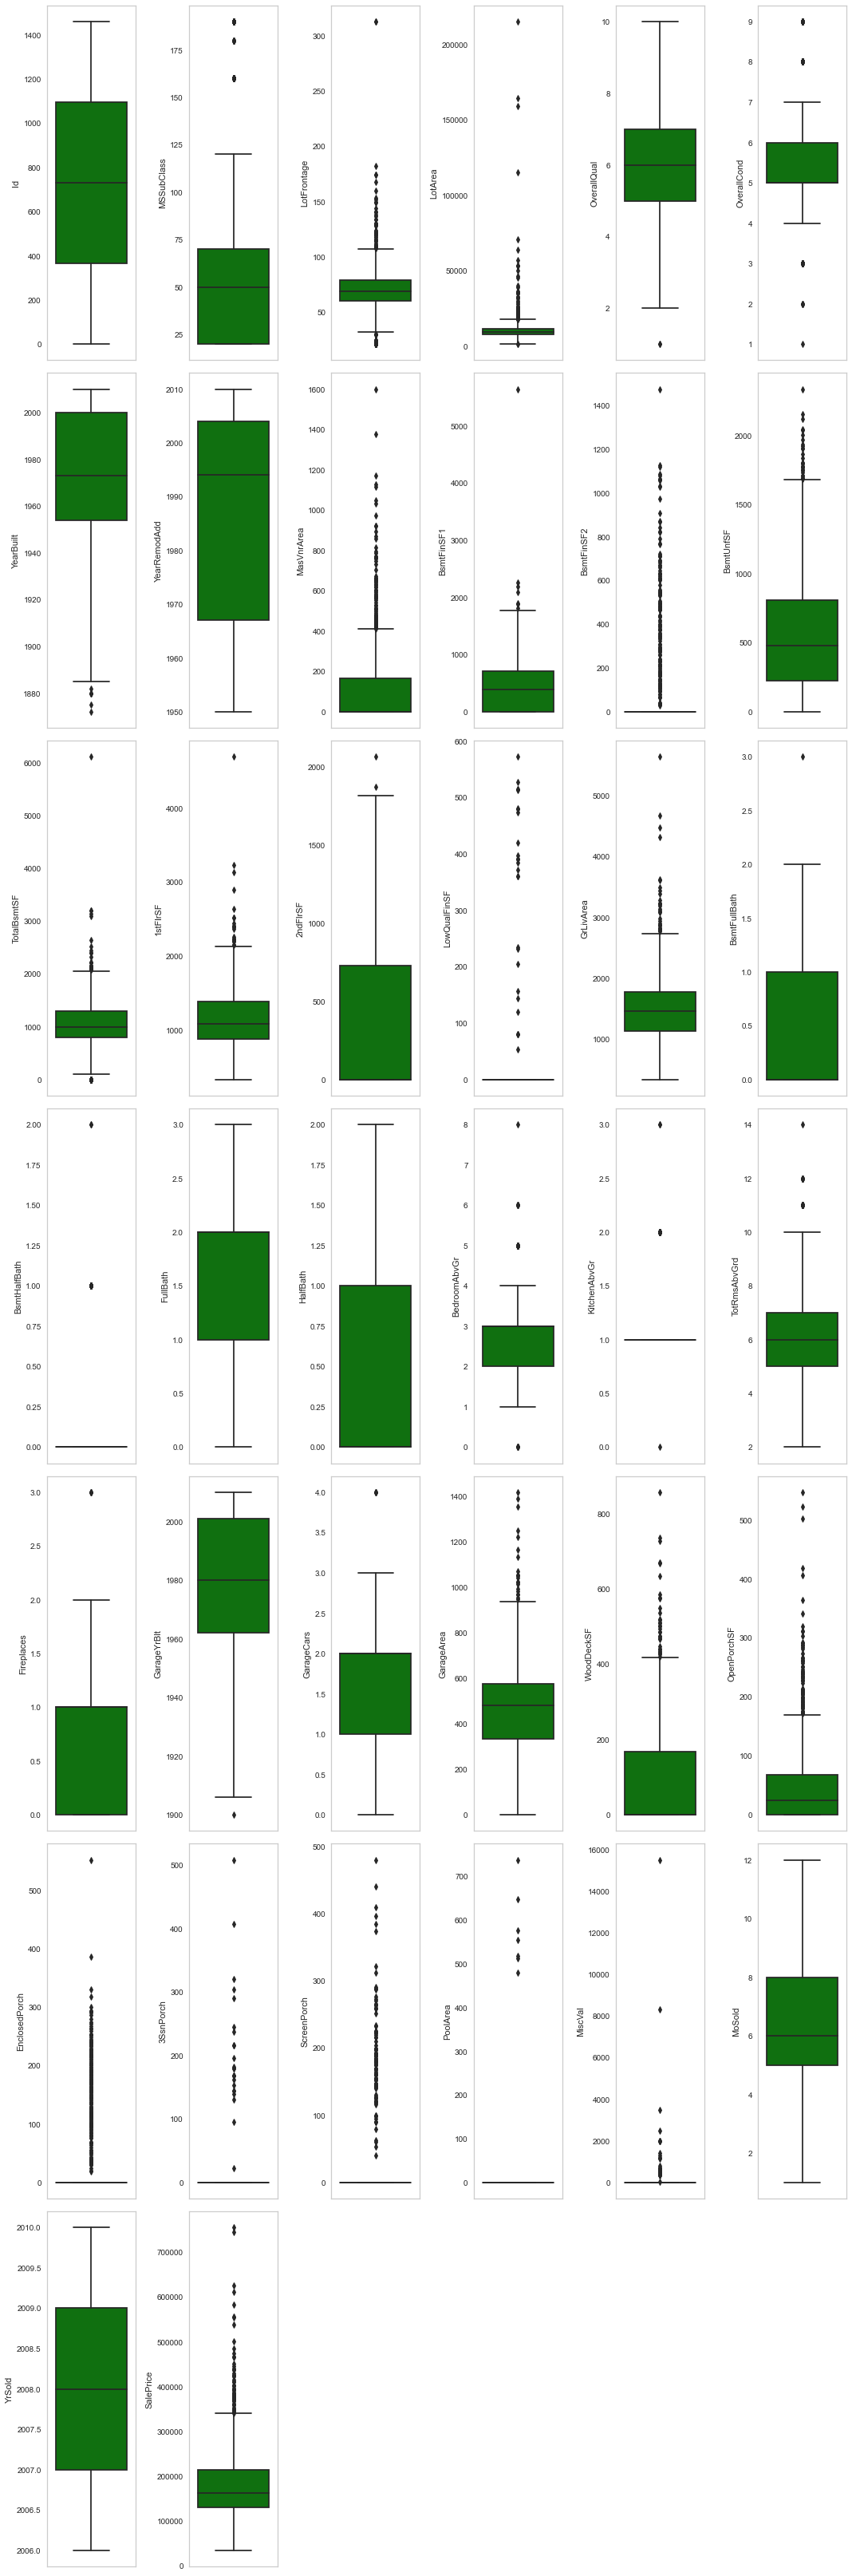

In [16]:
plt.figure(figsize=(15, 45))
for i in range(0, len(list(Ames_prepared[numerical]))):
    plt.subplot(7, 6, i+1)
    sns.boxplot(y=Ames_prepared[list(Ames_prepared[numerical])[i]],color='green',orient='v')
    plt.tight_layout()

### Correlation

In [17]:
# plot correlation heatmap to find out correlations

Ames_prepared.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.0,0.01116,-0.009921,-0.03323,-0.02836,0.01261,-0.01271,-0.022,-0.05107,-0.005024,-0.005968,-0.00794,-0.01541,0.0105,0.00559,-0.04423,0.008273,0.002289,-0.02015,0.005587,0.006784,0.03772,0.002951,0.02724,-0.01977,-0.0001223,0.01657,0.01763,-0.02964,-0.0004769,0.002889,-0.04663,0.00133,0.05704,-0.006242,0.02117,0.0007118,-0.02192
MSSubClass,0.01116,1.0,-0.3567,-0.1398,0.03263,-0.05932,0.02785,0.04058,0.02357,-0.06984,-0.06565,-0.1408,-0.2385,-0.2518,0.3079,0.04647,0.07485,0.003491,-0.002333,0.1316,0.1774,-0.02344,0.2817,0.04038,-0.04557,0.0814,-0.04011,-0.09867,-0.01258,-0.0061,-0.01204,-0.04382,-0.02603,0.008283,-0.007683,-0.01358,-0.02141,-0.08428
LotFrontage,-0.009921,-0.3567,1.0,0.3045,0.2348,-0.05328,0.1167,0.08335,0.1785,0.2144,0.04246,0.1241,0.3635,0.4138,0.07239,0.03747,0.368,0.09034,-0.006979,0.1805,0.04722,0.2368,-0.004905,0.3205,0.2332,0.063,0.2695,0.3235,0.07554,0.137,0.01029,0.06195,0.03766,0.1808,-0.0002554,0.01045,0.00638,0.3348
LotArea,-0.03323,-0.1398,0.3045,1.0,0.1058,-0.005636,0.01423,0.01379,0.1033,0.2141,0.1112,-0.002618,0.2608,0.2995,0.05099,0.004779,0.2631,0.1582,0.04805,0.126,0.01426,0.1197,-0.01778,0.19,0.2714,-0.02586,0.1549,0.1804,0.1717,0.08477,-0.01834,0.02042,0.04316,0.07767,0.03807,0.001205,-0.01426,0.2638
OverallQual,-0.02836,0.03263,0.2348,0.1058,1.0,-0.09193,0.5723,0.5507,0.4073,0.2397,-0.05912,0.3082,0.5378,0.4762,0.2955,-0.03043,0.593,0.1111,-0.04015,0.5506,0.2735,0.1017,-0.1839,0.4275,0.3968,0.5142,0.6007,0.562,0.2389,0.3088,-0.1139,0.03037,0.06489,0.06517,-0.03141,0.07082,-0.02735,0.791
OverallCond,0.01261,-0.05932,-0.05328,-0.005636,-0.09193,1.0,-0.376,0.07374,-0.1257,-0.04623,0.04023,-0.1368,-0.1711,-0.1442,0.02894,0.02549,-0.07969,-0.05494,0.1178,-0.1941,-0.06077,0.01298,-0.087,-0.05758,-0.02382,-0.3063,-0.1858,-0.1515,-0.003334,-0.03259,0.07036,0.0255,0.05481,-0.001985,0.06878,-0.003511,0.04395,-0.07786
YearBuilt,-0.01271,0.02785,0.1167,0.01423,0.5723,-0.376,1.0,0.5929,0.3116,0.2495,-0.04911,0.149,0.3915,0.282,0.01031,-0.1838,0.199,0.1876,-0.03816,0.4683,0.2427,-0.07065,-0.1748,0.09559,0.1477,0.7772,0.5379,0.479,0.2249,0.1887,-0.3873,0.03135,-0.05036,0.00495,-0.03438,0.0124,-0.01362,0.5229
YearRemodAdd,-0.022,0.04058,0.08335,0.01379,0.5507,0.07374,0.5929,1.0,0.1765,0.1285,-0.06776,0.1811,0.2911,0.2404,0.14,-0.06242,0.2874,0.1195,-0.01234,0.439,0.1833,-0.04058,-0.1496,0.1917,0.1126,0.6164,0.4206,0.3716,0.2057,0.2263,-0.1939,0.04529,-0.03874,0.005829,-0.01029,0.02149,0.03574,0.5071
MasVnrArea,-0.05107,0.02357,0.1785,0.1033,0.4073,-0.1257,0.3116,0.1765,1.0,0.2613,-0.07133,0.1139,0.3601,0.3399,0.1738,-0.06863,0.3881,0.08301,0.0274,0.273,0.1991,0.1028,-0.03845,0.2796,0.247,0.2444,0.3619,0.3709,0.16,0.1225,-0.1099,0.01914,0.06225,0.01193,-0.02951,-0.006723,-0.008317,0.4726
BsmtFinSF1,-0.005024,-0.06984,0.2144,0.2141,0.2397,-0.04623,0.2495,0.1285,0.2613,1.0,-0.05012,-0.4953,0.5224,0.4459,-0.1371,-0.0645,0.2082,0.6492,0.06742,0.05854,0.004262,-0.1074,-0.08101,0.04432,0.26,0.1488,0.2241,0.297,0.2043,0.1118,-0.1023,0.02645,0.06202,0.1405,0.003571,-0.01573,0.01436,0.3864


### Excluding Features in which it's Distinct Values are insignificant (Layer 1)

In [ ]:
drop1 = Ames_prepared['Utilities'] == 'NoSeWa'
drop2 = (Ames_prepared['Condition2'] == 'PosA') | (Ames_prepared['Condition2'] == 'RRAn') | (Ames_prepared['Condition2'] == 'RRAe')
drop3 = (Ames_prepared['RoofMatl'] == 'Metal') | (Ames_prepared['RoofMatl'] == 'Membran') | (Ames_prepared['RoofMatl'] == 'Roll') | (Ames_prepared['RoofMatl'] == 'ClyTile')
drop4 = (Ames_prepared['Exterior1st'] == 'AsphShn') | (Ames_prepared['Exterior1st'] == 'ImStucc') | (Ames_prepared['Exterior1st'] == 'CBlock')
drop5 = (Ames_prepared['Exterior2nd'] == 'Other') | (Ames_prepared['Exterior2nd'] == 'CBlock')
drop6 = Ames_prepared['ExterCond'] == 'Po'
drop7 = Ames_prepared['Heating'] == 'Floor'
drop8 = Ames_prepared['HeatingQC'] == 'Po'
drop9 = Ames_prepared['Electrical'] == 'Mix'
drop10 = Ames_prepared['Functional'] == 'Sev'
drop11 = Ames_prepared['MiscFeature'] == 'TenC'

Ames_prepared = Ames_prepared.loc[-drop1]
Ames_prepared = Ames_prepared.loc[-drop2]
Ames_prepared = Ames_prepared.loc[-drop3]
Ames_prepared = Ames_prepared.loc[-drop4]
Ames_prepared = Ames_prepared.loc[-drop5]
Ames_prepared = Ames_prepared.loc[-drop6]
Ames_prepared = Ames_prepared.loc[-drop7]
Ames_prepared = Ames_prepared.loc[-drop8]
Ames_prepared = Ames_prepared.loc[-drop9]
Ames_prepared = Ames_prepared.loc[-drop10]
Ames_prepared = Ames_prepared.loc[-drop11]

### Excluding Features in which it's Distinct Values are insignificant (Layer 2)

In [ ]:
drop12 = Ames_prepared['MiscFeature'] == 'Gar2'
drop13 = Ames_prepared['PoolQC'] == 'Fa'
drop14 = Ames_prepared['BsmtCond'] == 'Po'
drop15 = Ames_prepared['RoofStyle'] == 'Shed'

Ames_prepared = Ames_prepared.loc[-drop12]
Ames_prepared = Ames_prepared.loc[-drop13]
Ames_prepared = Ames_prepared.loc[-drop14]
Ames_prepared = Ames_prepared.loc[-drop15]

### Model Implementation Using Pycaret

### Preprocessing with Pycaret

In [18]:
# Preprocessing 
grid = setup(data=Ames_prepared , target= 'SalePrice', data_split_shuffle= True, session_id= 50,
             ignore_features = ['Id'], normalize = True, normalize_method = 'zscore', ignore_low_variance = True, 
             remove_outliers = False, transform_target = True) 

,Description,Value
0,session_id,50
1,Target,SalePrice
2,Original Data,"(1460, 81)"
3,Missing Values,False
4,Numeric Features,36
5,Categorical Features,43
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 203)"


### Comparing Models Performances

In [19]:
## Evaluate and compare models
best = compare_models(n_select = 3, sort = 'rmse')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,15940.9618,815377932.6576,26897.8601,0.8785,0.1308,0.0924,0.1200
lightgbm,Light Gradient Boosting Machine,16807.2525,937953699.3260,29044.6679,0.8642,0.1359,0.0955,0.0380
et,Extra Trees Regressor,17710.8978,880933842.2263,29067.6381,0.8634,0.1437,0.1010,0.3480
rf,Random Forest Regressor,17761.1738,932164441.1708,29491.6199,0.8589,0.1426,0.1013,0.3430
knn,K Neighbors Regressor,20490.5453,1429686243.6341,36094.5976,0.7888,0.1623,0.1137,0.0170
ada,AdaBoost Regressor,24489.3811,1461458023.9745,37439.7482,0.7751,0.1821,0.1357,0.0720
dt,Decision Tree Regressor,26145.3138,2065660521.8043,43535.0930,0.6557,0.2122,0.1503,0.0100
par,Passive Aggressive Regressor,22678.0801,16802482268.6943,63779.4634,-1.1875,0.1614,0.1341,0.0050
br,Bayesian Ridge,20228.3998,22136939032.8146,67353.6023,-1.8638,0.1460,0.1189,0.0210
en,Elastic Net,45293.8816,4871915545.6000,68212.0645,0.2613,0.3223,0.2545,0.0050


### Creating Machine Learning Models

### Gradient Boosting Regressor

In [20]:
GBR = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,16854.1033,757039424.2235,27514.3494,0.9176,0.1139,0.0850
1,15381.7071,472273053.7648,21731.8442,0.8957,0.1394,0.0998
2,15312.9851,650629132.9810,25507.4329,0.9014,0.1210,0.0885
3,11965.2345,291916521.4269,17085.5647,0.9407,0.1004,0.0717
4,17939.4966,701239788.3898,26480.9325,0.8853,0.1547,0.1084
5,12793.6172,332112983.3367,18223.9673,0.9008,0.1044,0.0804
6,19101.9725,1223333980.9305,34976.1916,0.8916,0.1237,0.0853
7,20089.5348,2681333870.3344,51781.5978,0.6551,0.1843,0.1203
8,15338.6368,549341001.9928,23438.0247,0.9082,0.1467,0.0968


In [21]:
print(GBR)

PowerTransformedTargetRegressor(alpha=0.9, ccp_alpha=0.0,
                                criterion='friedman_mse', init=None,
                                learning_rate=0.1, loss='ls', max_depth=3,
                                max_features=None, max_leaf_nodes=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_iter_no_change=None,
                                power_transformer_method...
                                                                    max_leaf_nodes=None,
                                                                    min_impurity_decrease=0.0,
                                                                    min_impurity_split=None,
                                                                 

### LGBM Regressor

In [22]:
LGBM = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,19528.6099,1165892306.2262,34145.1652,0.8730,0.1238,0.0948
1,17409.0208,678898241.5031,26055.6758,0.8500,0.1501,0.1089
2,16488.1869,777633689.0705,27886.0841,0.8821,0.1271,0.0929
3,13229.5717,392957028.2914,19823.1438,0.9201,0.1063,0.0765
4,18140.5595,800669725.1028,28296.1079,0.8691,0.1648,0.1115
5,10955.0331,239840387.8609,15486.7811,0.9284,0.0944,0.0702
6,21574.7836,2086654833.1524,45679.9172,0.8150,0.1380,0.0890
7,20237.4438,2128360896.2473,46134.1619,0.7262,0.1840,0.1263
8,14586.4398,466719511.9695,21603.6921,0.9220,0.1454,0.0952


In [23]:
print(LGBM)

PowerTransformedTargetRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=5...
                                                        importance_type='split',
                                                        learning_rate=0.1,
                                                        max_depth=-1,
                                                        min_child_samples=20,
                                                        min_child_weigh

### Extra Tress Regressor

In [24]:
ET = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20291.7184,1005260417.7571,31705.8420,0.8905,0.1322,0.1033
1,18130.1640,684325361.7900,26159.6132,0.8488,0.1602,0.1155
2,16536.8069,765813878.9421,27673.3424,0.8839,0.1295,0.0918
3,15942.1642,615331569.9645,24805.8777,0.8749,0.1278,0.0897
4,18327.6272,822238069.0225,28674.6939,0.8655,0.1612,0.1095
5,13444.7964,440489742.2707,20987.8475,0.8684,0.1239,0.0845
6,21670.3073,1710233007.5238,41354.9635,0.8484,0.1354,0.0917
7,19480.4179,1454636515.6353,38139.6974,0.8129,0.1717,0.1181
8,15890.5171,609805529.5096,24694.2408,0.8981,0.1549,0.1041


In [25]:
print(ET)

PowerTransformedTargetRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                                max_depth=None, max_features='auto',
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_jobs=-1, oob_score=False,
                                power_transformer_method='box-cox',
                                powe...
                                regressor=ExtraTreesRegressor(bootstrap=False,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                             

### Models Hyperparameter Tuning

### Gradient Boosting Regressor

In [27]:
tuned_GBR = tune_model(GBR, optimize = 'rmse', choose_better = True, n_iter = 25)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17370.8488,892130748.0452,29868.5579,0.9028,0.1149,0.0859
1,16033.2619,506808751.4200,22512.4133,0.8880,0.1391,0.1008
2,15912.2618,713645050.6630,26714.1358,0.8918,0.1241,0.0918
3,12461.1952,299594027.0263,17308.7847,0.9391,0.0978,0.0730
4,18061.7446,695363079.6119,26369.7380,0.8863,0.1460,0.1051
5,12172.8408,277482144.4078,16657.7953,0.9171,0.0988,0.0762
6,18760.3366,1136701814.7639,33715.0087,0.8992,0.1238,0.0832
7,19710.6448,2456187912.5816,49559.9426,0.6841,0.1809,0.1203
8,14672.7477,506148326.3673,22497.7405,0.9154,0.1423,0.0917


### LGBM Regressor

In [28]:
tuned_LGBM = tune_model(LGBM, optimize = 'rmse', choose_better = True, n_iter = 25)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,19904.1564,1461956358.9413,38235.5379,0.8408,0.1279,0.0937
1,19325.1819,708154620.6653,26611.1747,0.8436,0.1610,0.1214
2,16550.0103,917758730.1593,30294.5330,0.8609,0.1374,0.0943
3,13790.0114,549053188.6510,23431.8840,0.8884,0.1185,0.0813
4,18171.8062,751730523.2749,27417.7046,0.8771,0.1615,0.1113
5,13200.9547,331608309.0186,18210.1156,0.9010,0.1089,0.0841
6,22617.3588,2092635609.7348,45745.3343,0.8145,0.1490,0.0960
7,20520.9829,1441395070.0171,37965.7091,0.8146,0.1812,0.1301
8,15508.1832,650291274.5692,25500.8093,0.8913,0.1416,0.0930


### Extra Tree Regressor

In [29]:
tuned_ET = tune_model(ET, optimize = 'rmse', choose_better = True, n_iter = 25)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,21612.5289,1503154408.7874,38770.5353,0.8363,0.1396,0.1055
1,20075.4386,861703107.1047,29354.7800,0.8096,0.1717,0.1244
2,18343.1791,1105975253.6959,33256.2062,0.8323,0.1516,0.1032
3,16161.5068,767944617.7269,27711.8137,0.8439,0.1324,0.0894
4,20081.0498,897489268.6525,29958.1253,0.8532,0.1706,0.1201
5,15000.0990,520559134.0629,22815.7650,0.8445,0.1268,0.0931
6,24938.6302,2435989692.9170,49355.7463,0.7841,0.1503,0.1021
7,20873.7413,1374081914.5221,37068.6109,0.8233,0.1885,0.1331
8,17061.9684,752134516.3005,27425.0709,0.8743,0.1697,0.1131


### Machine Learning Models Interpretation

### Gradient Boosting Regressor

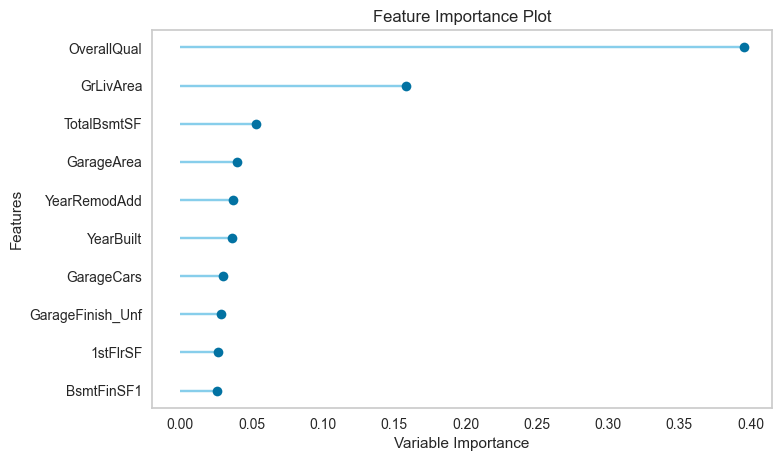

In [30]:
from pycaret.utils import check_metric

# Display feature and their importance
plot_model(tuned_GBR, plot = 'feature')

### LGBM Regressor

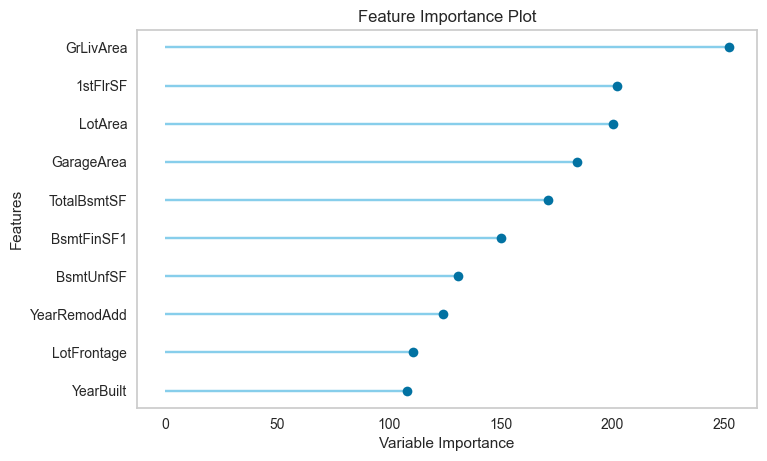

In [31]:
from pycaret.utils import check_metric

# Display feature and their importance
plot_model(tuned_LGBM, plot = 'feature')

### Extra Tree Regressor

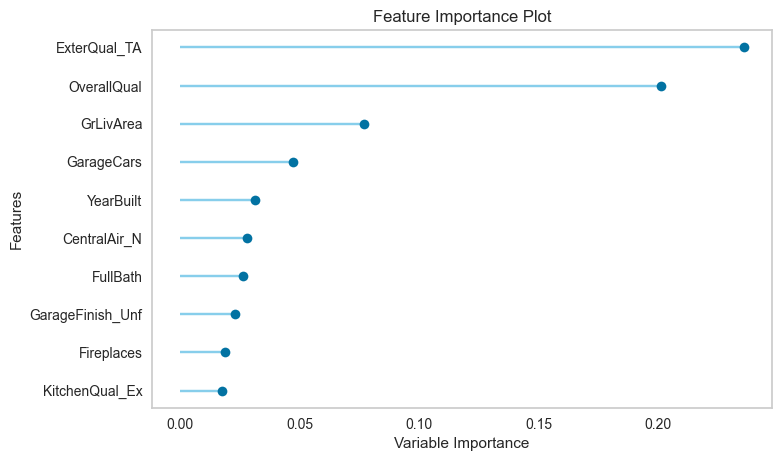

In [32]:
from pycaret.utils import check_metric

# Display feature and their importance
plot_model(tuned_ET, plot = 'feature')

### Choosing The Best Model

In [33]:
best_model = tuned_GBR
print(best_model)

PowerTransformedTargetRegressor(alpha=0.9, ccp_alpha=0.0,
                                criterion='friedman_mse', init=None,
                                learning_rate=0.05, loss='ls', max_depth=3,
                                max_features=1.0, max_leaf_nodes=None,
                                min_impurity_decrease=0.05,
                                min_impurity_split=None, min_samples_leaf=2,
                                min_samples_split=9,
                                min_weight_fraction_leaf=0.0, n_estimators=130,
                                n_iter_no_change=None,
                                power_transformer_metho...
                                                                    min_impurity_decrease=0.05,
                                                                    min_impurity_split=None,
                                                                    min_samples_leaf=2,
                                                                 

### Predicting Model on Test / Hold Out Set

In [34]:
predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,16392.4730,817850163.7381,28598.0797,0.8584,0.1337,0.0906


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice,Label
0,-0.870387,0.149539,-0.157147,1.381321,-0.519508,1.179863,1.063984,-0.576477,-0.909179,2.012364,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,201000.0,224294.286168
1,0.539820,0.680289,-0.045437,-0.059996,-0.519508,0.556785,0.197617,0.661455,0.744795,0.253206,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,175000.0,194262.782992
2,2.420095,-2.150379,-0.791924,-0.780655,1.254465,0.032087,-0.620618,0.938435,-0.445549,-0.382552,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,119500.0,110885.790603
3,-0.165284,-1.310024,-0.462839,-1.501313,2.141452,-1.607594,1.063984,-0.576477,0.641287,-1.152753,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,125500.0,112189.422238
4,-0.870387,0.459143,-0.029140,1.381321,-0.519508,1.081483,0.967721,0.814076,2.213317,-0.070370,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,305900.0,330946.192006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,1.479958,-1.442712,-0.550542,-0.059996,-0.519508,1.081483,0.919589,0.378822,0.483868,-0.867915,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,155900.0,143238.005244
435,0.304785,-0.027378,0.062769,1.381321,1.254465,-1.378039,-1.679511,-0.576477,-0.943682,0.512978,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,230000.0,199339.246409
436,-0.165284,-0.823503,-0.020904,-0.059996,-0.519508,-1.148483,-1.679511,-0.576477,-0.943682,1.132785,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,115000.0,135558.943043
437,-0.870387,0.237997,-0.068480,-0.780655,0.367478,-0.197468,-0.957538,-0.576477,0.846147,-0.981851,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,147500.0,135817.284377


### Residual Plot

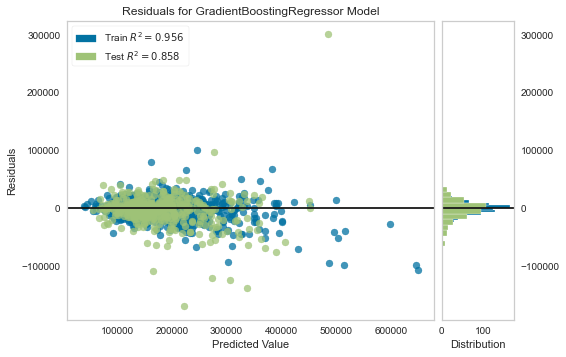

In [35]:
plot_model(tuned_GBR)

### Predicting Error Plot

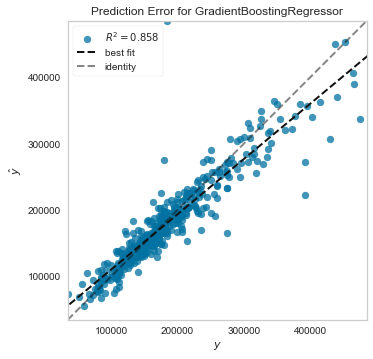

In [36]:
plot_model(tuned_GBR, plot = 'error')

### Finalizing Best Model

In [37]:
final_model = finalize_model(best_model)
print(final_model)

PowerTransformedTargetRegressor(alpha=0.9, ccp_alpha=0.0,
                                criterion='friedman_mse', init=None,
                                learning_rate=0.05, loss='ls', max_depth=3,
                                max_features=1.0, max_leaf_nodes=None,
                                min_impurity_decrease=0.05,
                                min_impurity_split=None, min_samples_leaf=2,
                                min_samples_split=9,
                                min_weight_fraction_leaf=0.0, n_estimators=130,
                                n_iter_no_change=None,
                                power_transformer_metho...
                                                                    min_impurity_decrease=0.05,
                                                                    min_impurity_split=None,
                                                                    min_samples_leaf=2,
                                                                 

### Predict Model on Unseen Data

In [40]:
# New Unseen Data
new_data = Ames_prepared.copy()
unseen_predictions = predict_model(final_model, data=new_data)
unseen_predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,12258.2423,345580312.7184,18589.7906,0.9452,0.0952,0.0696


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,Label
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal,207451.385830
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal,172606.015807
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal,209127.681005
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Abnorml,172395.223429
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal,292141.525299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,...,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal,173594.279121
1456,1457.0,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,...,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal,203218.985849
1457,1458.0,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,...,RFn,TA,TA,Y,Gd,GdPrv,Shed,WD,Normal,256622.605841
1458,1459.0,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,...,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal,131688.383125


In [50]:
# New Test Data
test_data = pd.read_csv('Ames_unseen.csv')

categorical = [var for var in test_data.columns if test_data[var].dtype=='O']
numerical = [var for var in test_data.columns if test_data[var].dtype!='O']

# Impute Missing Values for The Test Data
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = SimpleImputer(strategy='most_frequent')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical),
        ('cat', categorical_transformer, categorical)
    ])
# Fit to Dataframe
array_test = preprocessor.fit_transform(test_data)

# Converts the array to Dataframe
my_cols = numerical + categorical
Ames_unseen = pd.DataFrame(array_test, 
             columns=(list(my_cols)))

# Replace Features type to Their Correct Ones
Ames_unseen[numerical] = Ames_unseen[numerical].astype('float64')

In [51]:
unseen_predictions2 = predict_model(final_model, data=Ames_unseen)
unseen_predictions2

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,Label
0,1461.0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,...,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal,126077.546936
1,1462.0,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,...,Unf,TA,TA,Y,Ex,MnPrv,Gar2,WD,Normal,150424.896102
2,1463.0,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,...,Fin,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal,181881.893789
3,1464.0,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,...,Fin,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal,183602.895103
4,1465.0,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,...,RFn,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal,182323.878081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915.0,160.0,21.0,1936.0,4.0,7.0,1970.0,1970.0,0.0,0.0,...,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal,86384.238518
1455,2916.0,160.0,21.0,1894.0,4.0,5.0,1970.0,1970.0,0.0,252.0,...,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Abnorml,86196.846024
1456,2917.0,20.0,160.0,20000.0,5.0,7.0,1960.0,1996.0,0.0,1224.0,...,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Abnorml,164362.284014
1457,2918.0,85.0,62.0,10441.0,5.0,5.0,1992.0,1992.0,0.0,337.0,...,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal,118257.876932
